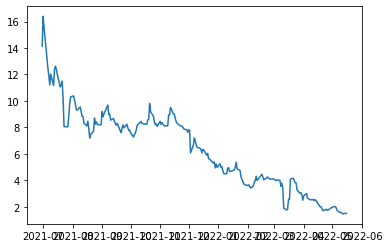

In [1]:
import matplotlib.pyplot as plt# plotting library
import yfinance as yf
sp500 = yf.Ticker("^GSPC").history(period='max')
msft = yf.Ticker("MSFT").history(period='max')
didi = yf.Ticker("DIDI").history(period='max')
didi_close = didi['Close']
plt.plot(didi_close)

Date
2021-06-30    14.14
2021-07-01    16.40
2021-07-02    15.53
2021-07-06    12.49
2021-07-07    11.91
Freq: D, Name: Close, dtype: float64

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -150.383
Date:                Mon, 16 May 2022   AIC                            310.766
Time:                        15:39:12   BIC                            327.757
Sample:                    06-30-2021   HQIC                           317.626
                         - 05-16-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7097      0.246      2.880      0.004       0.227       1.193
ar.L2         -0.1225      0.063     -1.944      0.052      -0.246       0.001
ar.L3         -0.1240      0.087     -1.422      0.1

/tmp/ipykernel_2689/2410630222.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


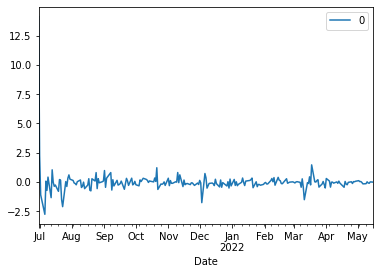

In [78]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

series = didi_close.copy()
series.index = series.index.to_period('D')
# fit model
model = ARIMA(series, order=(3,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()

In [43]:
#model_fit.plot_diagnostics()

In [55]:
model_fit.forecast(2)

/home/lsj/.pyenv/versions/3.8.11/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


222    1.480002
223    1.412523
Name: predicted_mean, dtype: float64

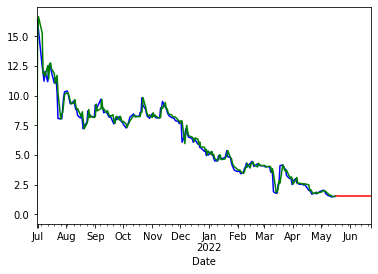

In [79]:
series.plot(color='b')

fc = model_fit.forecast(40)
fc.index = pd.date_range(didi_close.index[-1], periods=40)
fc.plot(color='r')

pr = model_fit.predict()
pr.plot(color='g')

In [70]:
pr

Date
2021-06-30     0.000000
2021-07-01    14.140001
2021-07-02    16.652685
2021-07-06    15.224370
2021-07-07    11.832857
                ...    
2022-05-10     1.538279
2022-05-11     1.573399
2022-05-12     1.571455
2022-05-13     1.529554
2022-05-16     1.550388
Freq: D, Name: predicted_mean, Length: 222, dtype: float64

In [71]:
fc

2022-05-16    1.480002
2022-05-17    1.412523
2022-05-18    1.389550
2022-05-19    1.434021
2022-05-20    1.495157
2022-05-21    1.506016
2022-05-22    1.464735
2022-05-23    1.421455
2022-05-24    1.417880
2022-05-25    1.448180
2022-05-26    1.476613
2022-05-27    1.478022
2022-05-28    1.457851
2022-05-29    1.439193
2022-05-30    1.437944
2022-05-31    1.450909
2022-06-01    1.463446
2022-06-02    1.464859
2022-06-03    1.456560
2022-06-04    1.447958
Freq: D, Name: predicted_mean, dtype: float64

In [68]:
pr

Date
2021-06-30     0.000000
2021-07-01    14.140001
2021-07-02    16.652685
2021-07-06    15.224370
2021-07-07    11.832857
                ...    
2022-05-10     1.538279
2022-05-11     1.573399
2022-05-12     1.571455
2022-05-13     1.529554
2022-05-16     1.550388
Freq: D, Name: predicted_mean, Length: 222, dtype: float64